# from pathlib import Path
import cantera as ct
import matplotlib.pyplot as plt
%matplotlib inline
import math as math
import numpy as np

Air_flow_rate = 5130 # Kg/h
hydraulic_dia = 1.54 # m
Area_air_inlet = (np.pi/4)*hydraulic_dia*hydraulic_dia

fuel_flow_rate = 325 # Kg/h
dia_nozzle = 0.044  # m
Area_fuel_inlet = (np.pi/4)*dia_nozzle*dia_nozzle

fuel_mass_flow = fuel_flow_rate/(3600*Area_fuel_inlet)
air_mass_flow = Air_flow_rate/(3600*Area_air_inlet)

comp_f = 'CH4:0.528, C2H6:0.03, N2:0.042, H2:0.4'  # fuel composition
comp_o = 'O2:0.21, N2:0.79'  # air composition

width = 0.2  # Distance between inlets is 20 cm

loglevel = 1  # amount of diagnostic output (0 to 5)

# Create the gas object used to evaluate all thermodynamic, kinetic, and transport properties.
# gas = ct.Solution('Jerzembeck.yaml')
gas = ct.Solution('gri30.yaml')
gas.TP = 303, 101375

# Create an object representing the counterflow flame configuration,
# which consists of a fuel inlet on the left, the flow in the middle,
# and the oxidizer inlet on the right.
f = ct.CounterflowDiffusionFlame(gas, width=width)

# Set the state of the two inlets
f.fuel_inlet.mdot = fuel_mass_flow/2.4  # assuming radial flow rate to be half of the axial flow rate - reducing the flow to prevent the flame from blowing out
f.fuel_inlet.X = comp_f
f.fuel_inlet.T = 303

f.oxidizer_inlet.mdot = air_mass_flow/2
f.oxidizer_inlet.X = comp_o
f.oxidizer_inlet.T = 1392

# Set the boundary emissivities
f.boundary_emissivities = 0.0, 0.0
# Turn radiation off
f.radiation_enabled = False

f.set_refine_criteria(ratio=4, slope=0.2, curve=0.3, prune=0.04)

# Solve the problem
f.solve(loglevel, auto=True)
f.show()

In [48]:
from pathlib import Path
import cantera as ct
import matplotlib.pyplot as plt
%matplotlib inline
import math as math
import numpy as np

In [49]:
# Effect of dilution of N2 in the air --------------------------------------------------
#comp_o = 'O2:0.21, N2:0.79'  # air composition
#comp_o5 = 'O2:0.1995, N2:0.8005'  # N2 as flue gas 50%
#comp_o20 = 'O2:0.168, N2:0.832'  # N2 as flue gas 20%
#comp_o10 = 'O2:0.189, N2:0.811'  # N2 as flue gas 10%

# Effect of dilution of Ar in the air --------------------------------------------------
#comp_o = 'O2:0.21, N2:0.79'  # air composition
#comp_o5 = 'O2:0.1995, N2:0.7505, Ar:0.05'  # N2 as flue gas 50%
#comp_o10 = 'O2:0.189, N2:0.711, Ar:0.1'  # N2 as flue gas 10%
#comp_o20 = 'O2:0.168, N2:0.632, Ar:0.2'  # N2 as flue gas 20%

# Effect of dilution of CO2 in the air --------------------------------------------------
comp_o = 'O2:0.21, N2:0.79'  # air composition
comp_o5 = 'O2:0.1995, N2:0.7505, CO2:0.05'  # N2 as flue gas 50%
comp_o10 = 'O2:0.189, N2:0.711, CO2:0.1'  # N2 as flue gas 10%
comp_o20 = 'O2:0.168, N2:0.632, CO2:0.2'  # N2 as flue gas 20%

In [50]:
Air_flow_rate = 5130 # Kg/h
hydraulic_dia = 1.54 # m
Area_air_inlet = (np.pi/4)*hydraulic_dia*hydraulic_dia

fuel_flow_rate = 325 # Kg/h
dia_nozzle = 0.044  # m
Area_fuel_inlet = (np.pi/4)*dia_nozzle*dia_nozzle

fuel_mass_flow = fuel_flow_rate/(3600*Area_fuel_inlet)
air_mass_flow = Air_flow_rate/(3600*Area_air_inlet)

a = 2.3
comp_f = 'CH4:0.528, C2H6:0.03, N2:0.042, H2:0.4'  # fuel composition (40 % H2)
#comp_f20 = 'CH4:0.54, C2H6:0.06, H2:0.4'
#comp_o20 = 'O2:1'  # Oxy-fuel combustion

width = 0.2  # Distance between inlets is 2 cm

loglevel = 1  # amount of diagnostic output (0 to 5)

# Create the gas object used to evaluate all thermodynamic, kinetic, and transport properties.
# gas = ct.Solution('Jerzembeck.yaml')
gas = ct.Solution('gri30.yaml')
gas.TP = 303, 101375

# Create an object representing the counterflow flame configuration,
# which consists of a fuel inlet on the left, the flow in the middle,
# and the oxidizer inlet on the right.
f = ct.CounterflowDiffusionFlame(gas, width=width)
f5 = ct.CounterflowDiffusionFlame(gas, width=width)
f10 = ct.CounterflowDiffusionFlame(gas, width=width)
f20 = ct.CounterflowDiffusionFlame(gas, width=width)

# Set the state of the two inlets of mixture 0------------------------------------------------------------
f.fuel_inlet.mdot = fuel_mass_flow/a  # assuming radial flow rate to be half of the axial flow rate
f.fuel_inlet.X = comp_f
f.fuel_inlet.T = 303
f.oxidizer_inlet.mdot = air_mass_flow/2
f.oxidizer_inlet.X = comp_o
f.oxidizer_inlet.T = 1392

# Set the state of the two inlets of mixture with 5 % dilution------------------------------------------------------------
f5.fuel_inlet.mdot = fuel_mass_flow/a  # assuming radial flow rate to be half of the axial flow rate
f5.fuel_inlet.X = comp_f
f5.fuel_inlet.T = 303
f5.oxidizer_inlet.mdot = air_mass_flow/2
f5.oxidizer_inlet.X = comp_o5
f5.oxidizer_inlet.T = 1392

# Set the state of the two inlets of mixture with 10 % dilution------------------------------------------------------------
f10.fuel_inlet.mdot = fuel_mass_flow/a  # assuming radial flow rate to be half of the axial flow rate
f10.fuel_inlet.X = comp_f
f10.fuel_inlet.T = 303
f10.oxidizer_inlet.mdot = air_mass_flow/2
f10.oxidizer_inlet.X = comp_o10
f10.oxidizer_inlet.T = 1392

# Set the state of the two inlets of mixture with 20 % dilution------------------------------------------------------------
f20.fuel_inlet.mdot = fuel_mass_flow/a  # assuming radial flow rate to be half of the axial flow rate
f20.fuel_inlet.X = comp_f
f20.fuel_inlet.T = 303
f20.oxidizer_inlet.mdot = air_mass_flow/2
f20.oxidizer_inlet.X = comp_o20
f20.oxidizer_inlet.T = 1392

# Set the boundary emissivities
f.boundary_emissivities = 0.0, 0.0
f5.boundary_emissivities = 0.0, 0.0
f10.boundary_emissivities = 0.0, 0.0
f20.boundary_emissivities = 0.0, 0.0

# Turn radiation off
f.radiation_enabled = False
f5.radiation_enabled = False
f10.radiation_enabled = False
f20.radiation_enabled = False

f.set_refine_criteria(ratio=4, slope=0.2, curve=0.3, prune=0.04)
f5.set_refine_criteria(ratio=4, slope=0.2, curve=0.3, prune=0.04)
f10.set_refine_criteria(ratio=4, slope=0.2, curve=0.3, prune=0.04)
f20.set_refine_criteria(ratio=4, slope=0.2, curve=0.3, prune=0.04)

# Solve the problem
f.solve(loglevel, auto=True)
f.show()

f5.solve(loglevel, auto=True)
f5.show()

f10.solve(loglevel, auto=True)
f10.show()

f20.solve(loglevel, auto=True)
f20.show()


************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003844      4.016
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement disabled.

******** Initial solve failed; Retrying with energy equation disabled ********

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003844      4.015
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement disabled.

********** Solving on 6 point grid with energy equa

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.068e-05      6.099
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002737      5.191
Attempt Newton solution of steady-state problem...    success.

Problem solved on [65] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 51 52 53 54 55 56 57 58 59 60 61 62 
    to resolve C C2H C2H2 C2H3 C2H4 C2H5 C2H6 C3H7 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CN CO CO2 H H2 H2CN H2O H2O2 HCCO HCCOH HCN HCNO HCO HNCO HNO HO2 HOCN N N2 N2O NCO NH NH2 NH3 NNH NO NO2 O O2 OH T spread_rate velocity 
##############################################################################
refine: discarding point at 0.1920212765957447

.....................................

Take 10 timesteps     0.0003844      3.715
Attempt Newton solution of steady-state problem...    success.

Problem solved on [12] point grid(s).

..............................................................................
grid refinement disabled.

******** Initial solve failed; Retrying with energy equation disabled ********

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003844      3.715
Attempt Newton solution of steady-state problem...    success.

Problem solved on [12] point grid(s).

..............................................................................
grid refinement disabled.

********** Solving on 12 point grid with energy equation re-enabled **********

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [12] point grid(s).

...........

Attempt Newton solution of steady-state problem...    success.

Problem solved on [94] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 
    to resolve C C2H C2H2 C2H3 C2H4 C2H5 C3H7 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CN CO CO2 H H2CN H2O2 HCCO HCCOH HCN HCNO HCO HNCO HNO HOCN N NCO NH NH2 NH3 NO O O2 OH 
##############################################################################
refine: discarding point at 0.19335106382978723

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [111] point grid(s).

..............................................................................
############################

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003844      3.721
Attempt Newton solution of steady-state problem...    success.

Problem solved on [12] point grid(s).

..............................................................................
grid refinement disabled.

******** Initial solve failed; Retrying with energy equation disabled ********

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003844      3.721
Attempt Newton solution of steady-state problem...    success.

Problem solved on [12] point grid(s).

..............................................................................
grid refinement disabled.

********** Solving on 12 point grid with energy equation re-enabled **********

..............................................................................
Attempt Newton solution of steady-state problem...

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002563      4.771
Attempt Newton solution of steady-state problem...    success.

Problem solved on [93] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 
    to resolve C C2H C2H2 C2H3 C2H4 C2H5 C3H7 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CN CO CO2 H H2CN H2O2 HCCO HCCOH HCN HCNO HCO HNCO HNO HOCN N NCO NH NH2 NH3 NO O O2 OH 
##############################################################################
refine: discarding point at 0.19335106382978723

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [111] point grid(s)

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003844      3.731
Attempt Newton solution of steady-state problem...    success.

Problem solved on [12] point grid(s).

..............................................................................
grid refinement disabled.

******** Initial solve failed; Retrying with energy equation disabled ********

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003844      3.731
Attempt Newton solution of steady-state problem...    success.

Problem solved on [12] point grid(s).

..............................................................................
grid refinement disabled.

********** Solving on 12 point grid with energy equation re-enabled **********

..............................................................................
Attempt Newton solution of steady-state problem...

In [51]:
NO_trial=f.concentrations[(gas.species_index('NO'))]*1e6
print(NO_trial)

[-5.88826394e-15 -5.88827009e-15 -5.88827596e-15 -5.88828157e-15
 -5.88828692e-15 -5.88829204e-15 -5.88829694e-15 -5.88830164e-15
 -5.88830613e-15 -5.88831044e-15 -5.88831457e-15 -5.88831854e-15
 -5.88832235e-15 -5.88832602e-15 -5.88832954e-15 -5.88833293e-15
 -5.88833619e-15 -5.88833932e-15 -5.88834235e-15 -5.88834526e-15
 -5.88834807e-15 -5.88835077e-15 -5.88835338e-15 -5.88835590e-15
 -5.88835833e-15 -5.88836067e-15 -5.88836293e-15 -5.88836512e-15
 -5.88836723e-15 -5.88836926e-15 -5.88837123e-15 -5.88837313e-15
 -5.88837496e-15 -5.88837673e-15 -5.88837844e-15 -5.88838009e-15
 -5.88838168e-15 -5.88838321e-15 -5.88838469e-15 -5.88838611e-15
 -5.88838748e-15 -5.88838880e-15 -5.88838965e-15 -5.88787077e-15
 -5.70568784e-15  6.47639733e-14  2.15793322e-11  1.82235739e-09
  1.65963468e-07  1.16947165e-05  5.76030881e-04  3.05964124e-03
  9.15669434e-03  2.83468485e-02  7.87448365e-02  1.83742845e-01
  3.52557682e-01  4.64772685e-01  5.89249373e-01  7.19141349e-01
  8.47655129e-01  9.69012

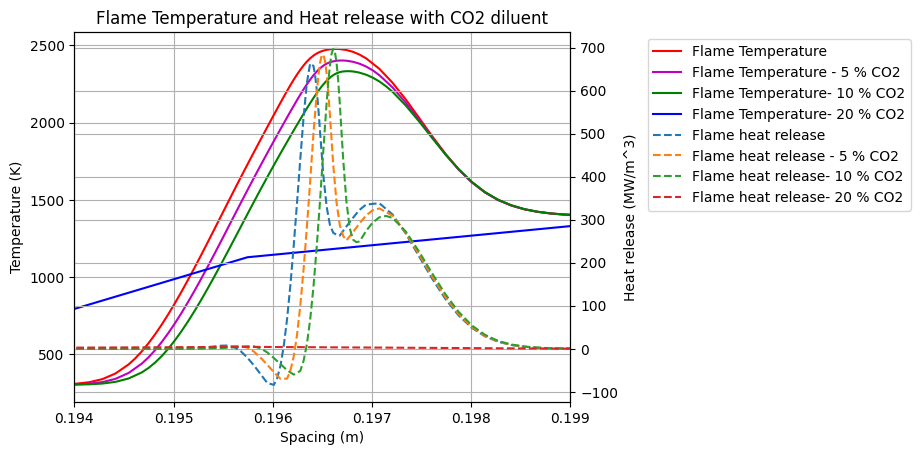

In [52]:
z = f.flame.grid
z5 = f5.flame.grid
z10 = f10.flame.grid
z20 = f20.flame.grid

heat_release_f = f.heat_release_rate/1000000
heat_release_f5 = f5.heat_release_rate/1000000
heat_release_f10 = f10.heat_release_rate/1000000
heat_release_f20 = f20.heat_release_rate/1000000

fig, ax1 = plt.subplots()
plt.title('Flame Temperature and Heat release with CO2 diluent')

ax2 = ax1.twinx()
ax1.plot(z, f.T, label='Flame Temperature',color='r')
ax1.plot(z5, f5.T, label='Flame Temperature - 5 % CO2',color='m')
ax1.plot(z10, f10.T, label='Flame Temperature- 10 % CO2',color='g')
ax1.plot(z20, f20.T, label='Flame Temperature- 20 % CO2',color='b')

#ax2.set_ylim(0,3000)

#ax2.yaxis.label.set_color('r')
ax1.spines['right']#.set_color('red')
ax1.tick_params(axis='y') #colors='red')
ax1.set_ylabel('Temperature (K)')

plt.xlim(0.194, 0.199)
#ax1.set_ylim(0,0.0014)

#ax1.plot(z,CO,label ='$Y_{CO}$')
#ax1.plot(z1,CO_fgr,label ='$Y_{CO-fgr}$')

ax2.plot(z, heat_release_f, label='Flame heat release',linestyle='dashed')
ax2.plot(z5, heat_release_f5, label='Flame heat release - 5 % CO2',linestyle='dashed')
ax2.plot(z10, heat_release_f10, label='Flame heat release- 10 % CO2',linestyle='dashed')
ax2.plot(z20, heat_release_f20, label='Flame heat release- 20 % CO2',linestyle='dashed')

ax2.set_ylabel('Heat release (MW/m^3)')
ax1.set_xlabel('Spacing (m)')
#ax1.legend(loc=4)
#ax2.legend(loc=3)
#plt.grid(True)
ax1.grid(True)
ax2.grid(True)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2,loc='upper right', bbox_to_anchor=(1.7, 1))

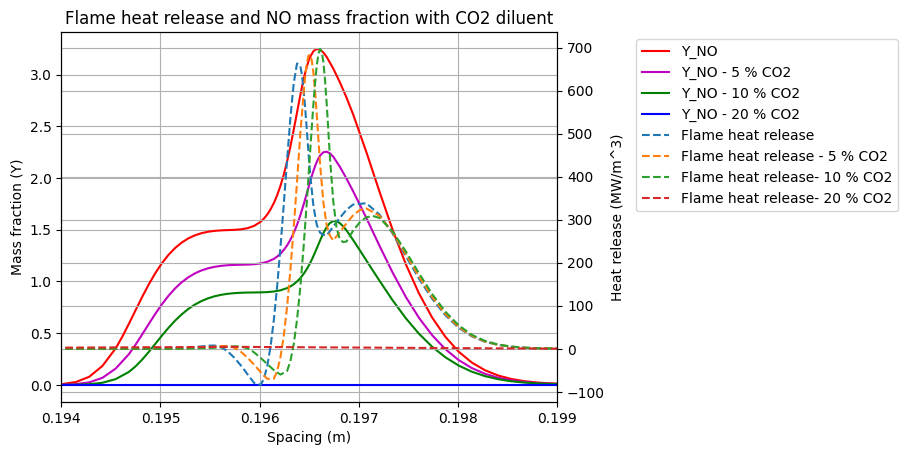

In [53]:
z = f.flame.grid
z5 = f5.flame.grid
z10 = f10.flame.grid
z20 = f20.flame.grid

NO=f.concentrations[(gas.species_index('NO'))]*1e6
NO_5=f5.concentrations[(gas.species_index('NO'))]*1e6
NO_10=f10.concentrations[(gas.species_index('NO'))]*1e6
NO_20=f20.concentrations[(gas.species_index('NO'))]*1e6

heat_release_f = f.heat_release_rate/1000000
heat_release_f5 = f5.heat_release_rate/1000000
heat_release_f10 = f10.heat_release_rate/1000000
heat_release_f20 = f20.heat_release_rate/1000000

fig, ax1 = plt.subplots()
plt.title('Flame heat release and NO mass fraction with CO2 diluent')

ax2 = ax1.twinx()
ax1.plot(z,NO,label ='Y_NO',color = 'r')
ax1.plot(z5,NO_5,label ='Y_NO - 5 % CO2 ',color = 'm')
ax1.plot(z10,NO_10,label ='Y_NO - 10 % CO2 ',color='g')
ax1.plot(z20,NO_20,label ='Y_NO - 20 % CO2 ',color='b')

#ax2.set_ylim(0,3000)

#ax2.yaxis.label.set_color('r')
ax1.spines['right']#.set_color('red')
ax1.tick_params(axis='y') #colors='red')
ax1.set_ylabel('Mass fraction (Y)')

plt.xlim(0.194, 0.199)
#ax1.set_ylim(0,0.0014)

#ax1.plot(z,CO,label ='$Y_{CO}$')
#ax1.plot(z1,CO_fgr,label ='$Y_{CO-fgr}$')

ax2.plot(z, heat_release_f, label='Flame heat release',linestyle='dashed')
ax2.plot(z5, heat_release_f5, label='Flame heat release - 5 % CO2',linestyle='dashed')
ax2.plot(z10, heat_release_f10, label='Flame heat release- 10 % CO2',linestyle='dashed')
ax2.plot(z20, heat_release_f20, label='Flame heat release- 20 % CO2',linestyle='dashed')

ax2.set_ylabel('Heat release (MW/m^3)')
ax1.set_xlabel('Spacing (m)')
#ax1.legend(loc=4)
#ax2.legend(loc=3)
#plt.grid(True)
ax1.grid(True)
ax2.grid(True)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2,loc='upper right', bbox_to_anchor=(1.7, 1))

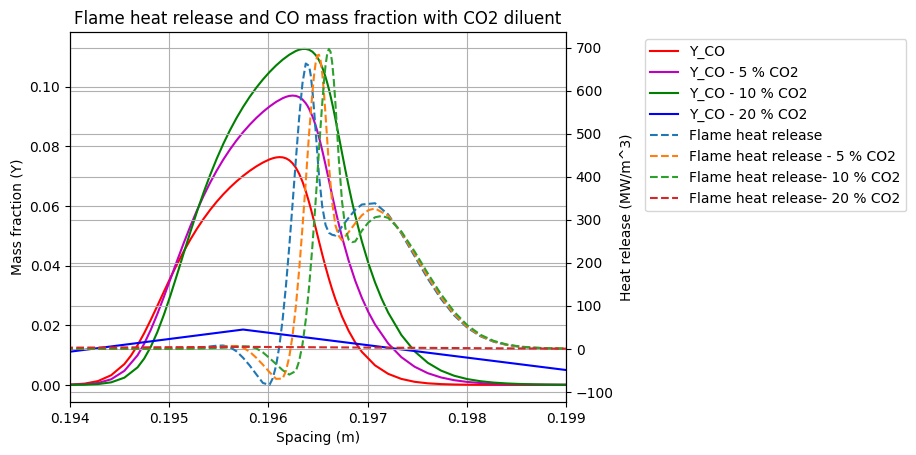

In [54]:
z = f.flame.grid
z5 = f5.flame.grid
z10 = f10.flame.grid
z20 = f20.flame.grid

CO=f.Y[(gas.species_index('CO'))]
CO_5=f5.Y[(gas.species_index('CO'))]
CO_10=f10.Y[(gas.species_index('CO'))]
CO_20=f20.Y[(gas.species_index('CO'))]

heat_release_f = f.heat_release_rate/1000000
heat_release_f5 = f5.heat_release_rate/1000000
heat_release_f10 = f10.heat_release_rate/1000000
heat_release_f20 = f20.heat_release_rate/1000000

fig, ax1 = plt.subplots()
plt.title('Flame heat release and CO mass fraction with CO2 diluent')

ax2 = ax1.twinx()
ax1.plot(z,CO,label ='Y_CO',color = 'r')
ax1.plot(z5,CO_5,label ='Y_CO - 5 % CO2 ',color = 'm')
ax1.plot(z10,CO_10,label ='Y_CO - 10 % CO2 ',color='g')
ax1.plot(z20,CO_20,label ='Y_CO - 20 % CO2 ',color='b')

#ax2.set_ylim(0,3000)

#ax2.yaxis.label.set_color('r')
ax1.spines['right']#.set_color('red')
ax1.tick_params(axis='y') #colors='red')
ax1.set_ylabel('Mass fraction (Y)')

plt.xlim(0.194, 0.199)
#ax1.set_ylim(0,0.0014)

#ax1.plot(z,CO,label ='$Y_{CO}$')
#ax1.plot(z1,CO_fgr,label ='$Y_{CO-fgr}$')

ax2.plot(z, heat_release_f, label='Flame heat release',linestyle='dashed')
ax2.plot(z5, heat_release_f5, label='Flame heat release - 5 % CO2',linestyle='dashed')
ax2.plot(z10, heat_release_f10, label='Flame heat release- 10 % CO2',linestyle='dashed')
ax2.plot(z20, heat_release_f20, label='Flame heat release- 20 % CO2',linestyle='dashed')

ax2.set_ylabel('Heat release (MW/m^3)')
ax1.set_xlabel('Spacing (m)')
#ax1.legend(loc=4)
#ax2.legend(loc=3)
#plt.grid(True)
ax1.grid(True)
ax2.grid(True)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2,loc='upper right', bbox_to_anchor=(1.7, 1))

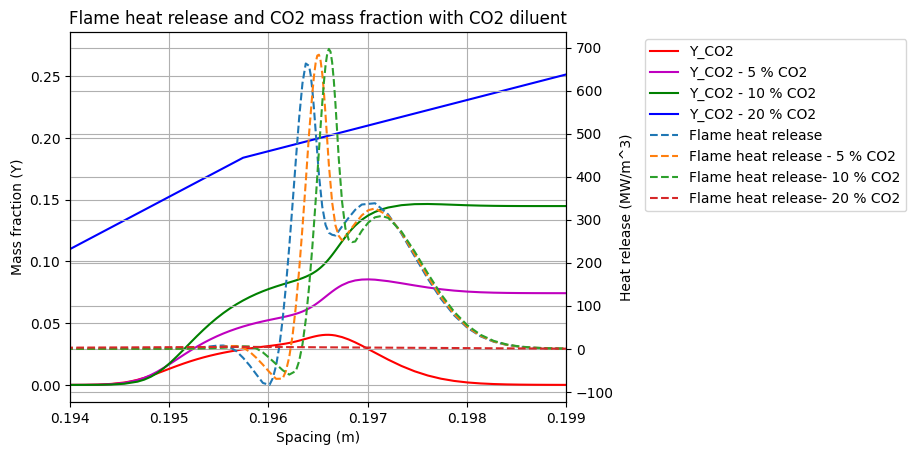

In [55]:
z = f.flame.grid
z5 = f5.flame.grid
z10 = f10.flame.grid
z20 = f20.flame.grid

CO2=f.Y[(gas.species_index('CO2'))]
CO2_5=f5.Y[(gas.species_index('CO2'))]
CO2_10=f10.Y[(gas.species_index('CO2'))]
CO2_20=f20.Y[(gas.species_index('CO2'))]

heat_release_f = f.heat_release_rate/1000000
heat_release_f5 = f5.heat_release_rate/1000000
heat_release_f10 = f10.heat_release_rate/1000000
heat_release_f20 = f20.heat_release_rate/1000000

fig, ax1 = plt.subplots()
plt.title('Flame heat release and CO2 mass fraction with CO2 diluent')

ax2 = ax1.twinx()
ax1.plot(z,CO2,label ='Y_CO2',color = 'r')
ax1.plot(z5,CO2_5,label ='Y_CO2 - 5 % CO2 ',color = 'm')
ax1.plot(z10,CO2_10,label ='Y_CO2 - 10 % CO2 ',color='g')
ax1.plot(z20,CO2_20,label ='Y_CO2 - 20 % CO2 ',color='b')

#ax2.set_ylim(0,3000)

#ax2.yaxis.label.set_color('r')
ax1.spines['right']#.set_color('red')
ax1.tick_params(axis='y') #colors='red')
ax1.set_ylabel('Mass fraction (Y)')

plt.xlim(0.194, 0.199)
#ax1.set_ylim(0,0.0014)

#ax1.plot(z,CO,label ='$Y_{CO}$')
#ax1.plot(z1,CO_fgr,label ='$Y_{CO-fgr}$')

ax2.plot(z, heat_release_f, label='Flame heat release',linestyle='dashed')
ax2.plot(z5, heat_release_f5, label='Flame heat release - 5 % CO2',linestyle='dashed')
ax2.plot(z10, heat_release_f10, label='Flame heat release- 10 % CO2',linestyle='dashed')
ax2.plot(z20, heat_release_f20, label='Flame heat release- 20 % CO2',linestyle='dashed')

ax2.set_ylabel('Heat release (MW/m^3)')
ax1.set_xlabel('Spacing (m)')
#ax1.legend(loc=4)
#ax2.legend(loc=3)
#plt.grid(True)
ax1.grid(True)
ax2.grid(True)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2,loc='upper right', bbox_to_anchor=(1.7, 1))

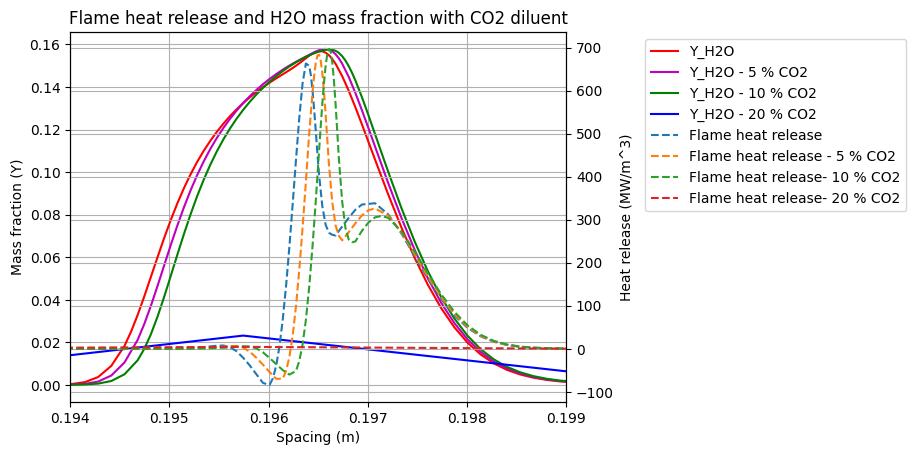

In [56]:
z = f.flame.grid
z5 = f5.flame.grid
z10 = f10.flame.grid
z20 = f20.flame.grid

H2O=f.Y[(gas.species_index('H2O'))]
H2O_5=f5.Y[(gas.species_index('H2O'))]
H2O_10=f10.Y[(gas.species_index('H2O'))]
H2O_20=f20.Y[(gas.species_index('H2O'))]

heat_release_f = f.heat_release_rate/1000000
heat_release_f5 = f5.heat_release_rate/1000000
heat_release_f10 = f10.heat_release_rate/1000000
heat_release_f20 = f20.heat_release_rate/1000000

fig, ax1 = plt.subplots()
plt.title('Flame heat release and H2O mass fraction with CO2 diluent')

ax2 = ax1.twinx()
ax1.plot(z,H2O,label ='Y_H2O',color = 'r')
ax1.plot(z5,H2O_5,label ='Y_H2O - 5 % CO2 ',color = 'm')
ax1.plot(z10,H2O_10,label ='Y_H2O - 10 % CO2 ',color='g')
ax1.plot(z20,H2O_20,label ='Y_H2O - 20 % CO2 ',color='b')

#ax2.set_ylim(0,3000)

#ax2.yaxis.label.set_color('r')
ax1.spines['right']#.set_color('red')
ax1.tick_params(axis='y') #colors='red')
ax1.set_ylabel('Mass fraction (Y)')

plt.xlim(0.194, 0.199)
#ax1.set_ylim(0,0.0014)

#ax1.plot(z,CO,label ='$Y_{CO}$')
#ax1.plot(z1,CO_fgr,label ='$Y_{CO-fgr}$')

ax2.plot(z, heat_release_f, label='Flame heat release',linestyle='dashed')
ax2.plot(z5, heat_release_f5, label='Flame heat release - 5 % CO2',linestyle='dashed')
ax2.plot(z10, heat_release_f10, label='Flame heat release- 10 % CO2',linestyle='dashed')
ax2.plot(z20, heat_release_f20, label='Flame heat release- 20 % CO2',linestyle='dashed')

ax2.set_ylabel('Heat release (MW/m^3)')
ax1.set_xlabel('Spacing (m)')
#ax1.legend(loc=4)
#ax2.legend(loc=3)
#plt.grid(True)
ax1.grid(True)
ax2.grid(True)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2,loc='upper right', bbox_to_anchor=(1.7, 1))

In [66]:
a = max(f.Y[(gas.species_index('H2O'))]*1e6)
b = max(f5.Y[(gas.species_index('H2O'))]*1e6)
c = max(f10.Y[(gas.species_index('H2O'))]*1e6)
d = max(f20.Y[(gas.species_index('H2O'))]*1e6)


In [67]:
var5_b = ((b-a)/a)*100
var5_c = ((c-a)/a)*100
var5_d = ((d-a)/a)*100

In [68]:
print(var5_b)
print(var5_c)
print(var5_d)

0.6658343363304071
0.46568927601131993
-85.21997348226581
